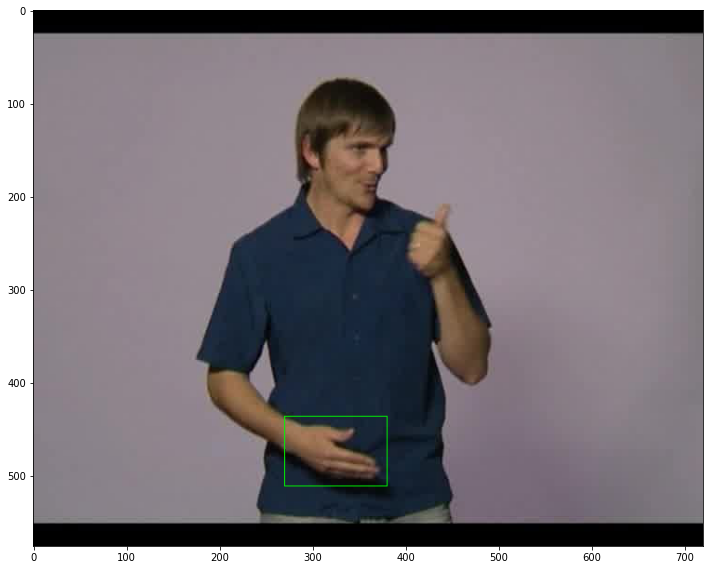

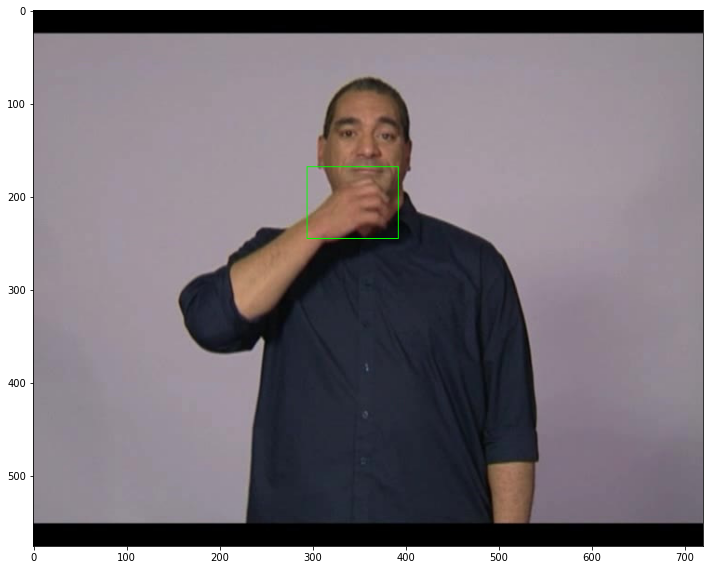

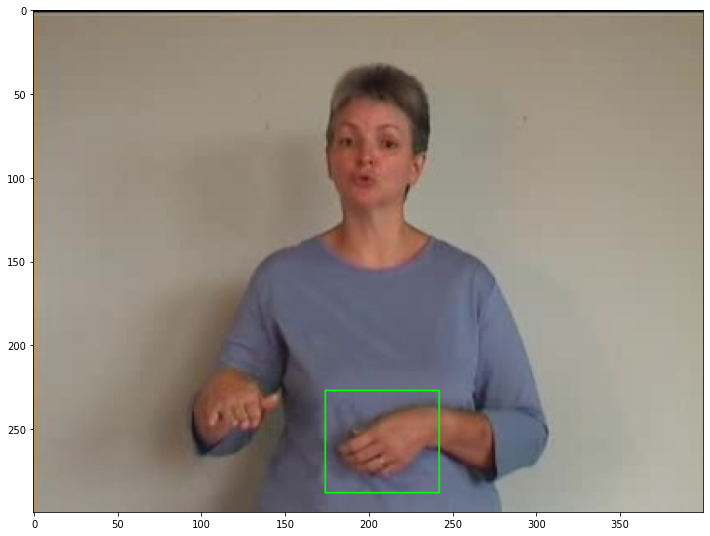

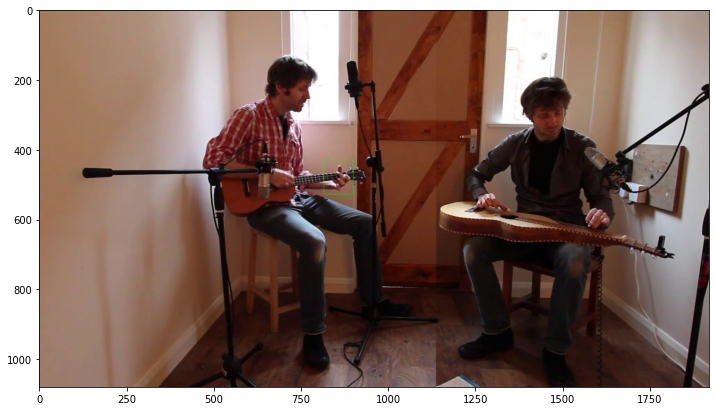

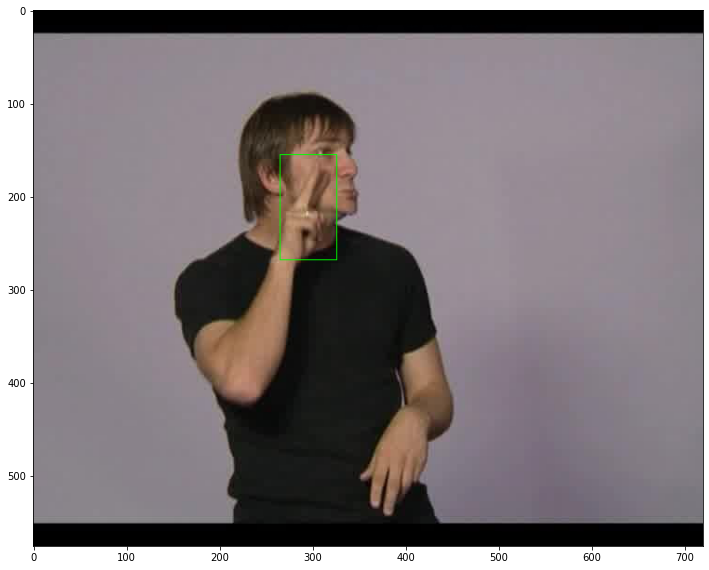

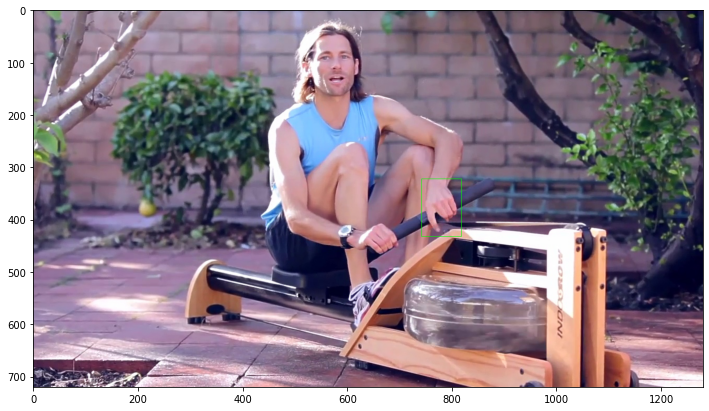

In [15]:
import json
import os 
import cv2
# %pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = '/Users/deepmind/Desktop/hand_labels/manual_train/'
list_json = [file for file in os.listdir(path) if ".json" in file]

for i,file_json in enumerate(list_json):
    f = open(path+file_json)
    annotation = json.load(f)
    point = annotation['hand_pts']
#     print(file_json)
    
    # Get all point x and y 
    x_list = [tick[0] for tick in point]
    y_list = [tick[1] for tick in point]
    
    x_min = min(x_list)
    x_max = max(x_list)

    y_min = min(y_list)
    y_max = max(y_list)
    
#     center_x , center_y = annotation['hand_box_center']
    file_image = file_json.replace('.json','.jpg')
    img = mpimg.imread(path+file_image)
    
    cv2.rectangle(img, (int(x_min-10), int(y_min-16)), (int(x_max+10), int(y_max)+10), color=(0, 255, 0), thickness =1)
#     name_name = '/Users/deepmind/Desktop/hand_labels/output_check/'+str(i)+'.png'
#     cv2.imwrite(name_name,img)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    
    if i == 5:
        break
    

    
    

# Insert to VinAI CoCo

In [ ]:
# Split data 
number_training = round(len(list_json)*80/100)
list_json_training = list_json[:number_training]
list_json_validate =list_json[number_training:]



In [16]:
dataset = {}
dataset['info'] = {} 
dataset['info']["contributor"] = "Vin-AI Lab"
dataset['info']["date_created"] = '4/5/2020' 
dataset['info']["description"] = "Hand-Dataset" 
dataset['info']["url"] = "https://github.com/oggyfaker"
dataset['info']["Version"] = "1.0"
dataset['info']["year"] = "2020"


license = {} 
license['id'] = 1 
license['name'] = "VinAi Lab"
license['url'] = "https://github.com/oggyfaker"
dataset["licenses"] = []
dataset["licenses"].append(license)
print(dataset)

# Validation 
dataset2 = {}
dataset2['info'] = dataset['info']
dataset2["licenses"] = dataset["licenses"]

{'info': {'contributor': 'Vin-AI Lab', 'date_created': '4/5/2020', 'description': 'Hand-Dataset', 'url': 'https://github.com/oggyfaker', 'Version': '1.0', 'year': '2020'}, 'licenses': [{'id': 1, 'name': 'VinAi Lab', 'url': 'https://github.com/oggyfaker'}]}


In [20]:
# Create dictionary of name and height and weight
path = '/Users/deepmind/Desktop/hand_labels/manual_train/'
list_image_training = [file.replace('.json','.jpg') for file in list_json_training ]
list_image_validate = [file.replace('.json','.jpg') for file in list_json_validate ]
print("We have : ",len(list_image_training) + len(list_image_validate))

import cv2
image_dict_training = {}
for image_item in list_image_training:
    h, w, c  = (cv2.imread(path+image_item)).shape
    image_dict_training[image_item] = [w,h]

dataset['image'] = []
for i,image_name in enumerate(image_dict_training):
    dict_tmp = {}
    dict_tmp['file_name'] = image_name
    dict_tmp['width'] ,dict_tmp['height'] = image_dict_training[image_name]
    dict_tmp["id"] = i 
    dict_tmp['license'] = 1
    dict_tmp["flickr_url"] = ""
    dict_tmp["coco_url"] = ""
    dict_tmp["date_captured"] = "15/5/2020"
    dataset['image'].append(dict_tmp)
    

We have :  1912


In [25]:
import cv2
image_dict_validate = {}
for image_item in list_image_validate:
    h, w, c  = (cv2.imread(path+image_item)).shape
    image_dict_validate[image_item] = [w,h]
    
dataset2['image'] = []
for i,image_name in enumerate(image_dict_validate):
    dict_tmp = {}
    dict_tmp['file_name'] = image_name
    dict_tmp['width'] ,dict_tmp['height'] = image_dict_validate[image_name]
    dict_tmp["id"] = i 
    dict_tmp['license'] = 1
    dict_tmp["flickr_url"] = ""
    dict_tmp["coco_url"] = ""
    dict_tmp["date_captured"] = "15/5/2020"
    dataset2['image'].append(dict_tmp)


In [27]:
dataset['image'][0]

{'file_name': 'Alexander_a_visit_to_the_cafe.flv_000061_r.jpg',
 'width': 720,
 'height': 576,
 'id': 0,
 'license': 1,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': '15/5/2020'}

In [28]:
# Category 
dict_temp_cat = {}
dict_temp_cat['id'] = 1 
dict_temp_cat['name'] = "hand"
dict_temp_cat["supercategory"] = "Body"

dataset['categories'] = []
dataset['categories'].append(dict_temp_cat)

#Val
dict_temp_cat = {}
dict_temp_cat['id'] = 1 
dict_temp_cat['name'] = "hand"
dict_temp_cat["supercategory"] = "Body"

dataset2['categories'] = []
dataset2['categories'].append(dict_temp_cat)

dataset2['categories']

[{'id': 1, 'name': 'hand', 'supercategory': 'Body'}]

In [29]:
#
dataset['annotation'] = []
count_id = 0

#
for item_image in list_image_training:
    if ".jpg" in item_image:
        file_json = item_image.replace(".jpg",".json")
        f = open(path+file_json)
        annotation = json.load(f)
        point = annotation['hand_pts']
        
        x_list = [tick[0] for tick in point]
        y_list = [tick[1] for tick in point]
    
        x_min = min(x_list)
        x_max = max(x_list)

        y_min = min(y_list)
        y_max = max(y_list)
        
        width = x_max - x_min 
        height = y_max - y_min 
        
        dict_anotate_temp = {}
        dict_anotate_temp['id'] = count_id
        count_id += 1 
        # 1 == hand 
        dict_anotate_temp["category_id"] = 1 
        
        for image in dataset['image']:
            if image['file_name'] == item_image:
                id_image = image['id']
                break 
                
        dict_anotate_temp["image_id"] = id_image
        dict_anotate_temp["iscrowd"] = 0
        dict_anotate_temp["segmentation"] = [[]]
        dict_anotate_temp["area"] = width *  height
        dict_anotate_temp["bbox"] = [x_min,y_min,width,height]
        #
        dataset['annotation'].append(dict_anotate_temp)

        
with open("Result Json/detectionCMU_train2020.json", "w") as outfile: 
    json.dump(dataset, outfile)

In [30]:
#
dataset2['annotation'] = []
count_id = 0

#
for item_image in list_image_validate:
    if ".jpg" in item_image:
        file_json = item_image.replace(".jpg",".json")
        f = open(path+file_json)
        annotation = json.load(f)
        point = annotation['hand_pts']
        
        x_list = [tick[0] for tick in point]
        y_list = [tick[1] for tick in point]
    
        x_min = min(x_list)
        x_max = max(x_list)

        y_min = min(y_list)
        y_max = max(y_list)
        
        width = x_max - x_min 
        height = y_max - y_min 
        
        dict_anotate_temp = {}
        dict_anotate_temp['id'] = count_id
        count_id += 1 
        # 1 == hand 
        dict_anotate_temp["category_id"] = 1 
        
        for image in dataset['image']:
            if image['file_name'] == item_image:
                id_image = image['id']
                break 
                
        dict_anotate_temp["image_id"] = id_image
        dict_anotate_temp["iscrowd"] = 0
        dict_anotate_temp["segmentation"] = [[]]
        dict_anotate_temp["area"] = width *  height
        dict_anotate_temp["bbox"] = [x_min,y_min,width,height]
        #
        dataset2['annotation'].append(dict_anotate_temp)

        
with open("Result Json/detectionCMU_validation2020.json", "w") as outfile: 
    json.dump(dataset2, outfile)
    